In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [6]:
# Download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [3]:
df = pd.read_csv('/content/drive/MyDrive/flipkart.csv')

In [4]:
df.head()

,Unnamed: 0,Product_name,Review,Rating
0,0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2304 non-null   int64 
 1   Product_name  2304 non-null   object
 2   Review        2304 non-null   object
 3   Rating        2304 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 72.1+ KB


In [7]:
# Step 2: Clean the reviews (you can customize the cleaning step as per requirement)
def clean_text(text):
    # Basic text cleaning steps like removing special characters and converting to lowercase
    text = text.lower()  # convert text to lowercase
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])  # remove non-alphanumeric characters
    return text

df['cleaned_review'] = df['Review'].apply(clean_text)

In [8]:
# Step 3: Sentiment Analysis using VADER SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def get_sentiment_score(review):
    score = sia.polarity_scores(review)
    return score['compound']  # compound score is a normalized score between -1 (negative) and 1 (positive)

df['sentiment_score'] = df['cleaned_review'].apply(get_sentiment_score)

In [9]:
# Step 4: Assign sentiment labels based on the sentiment score
def get_sentiment_label(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment_score'].apply(get_sentiment_label)

<ipython-input-10-22e5aaca62e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=df, palette='coolwarm')


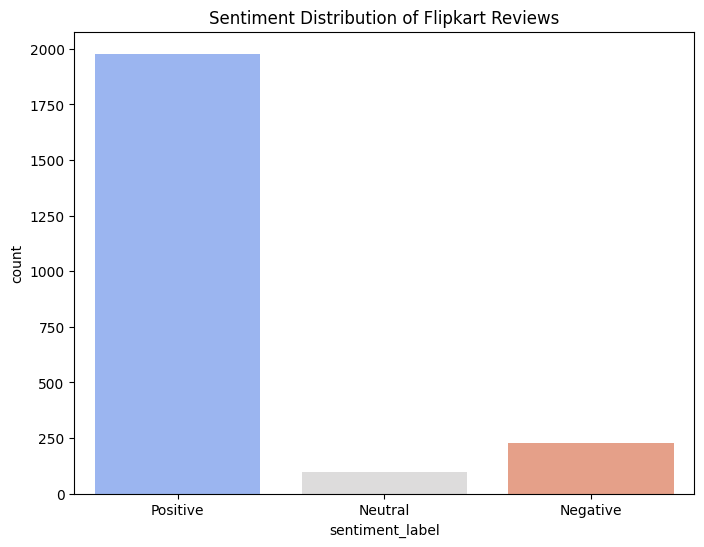

In [10]:
# Step 5: Visualize the sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=df, palette='coolwarm')
plt.title('Sentiment Distribution of Flipkart Reviews')
plt.show()

In [12]:
df.to_csv('flipkart_reviews_with_sentiment.csv', index=False)

In [13]:
print(df[['Product_name', 'Review', 'sentiment_label']].head(10))

                                        Product_name  \
0  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
1  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
2  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
3  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
4  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
5  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
6  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
7  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
8  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
9  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   

                                              Review sentiment_label  
0  Best under 60k Great performanceI got it for a...        Positive  
1                                 Good perfomence...        Positive  
2  Great performance but usually it has also that...        Positive  
3           My wife is so happy and best product 👌🏻😘        Positive  
4  Light weight laptop with 

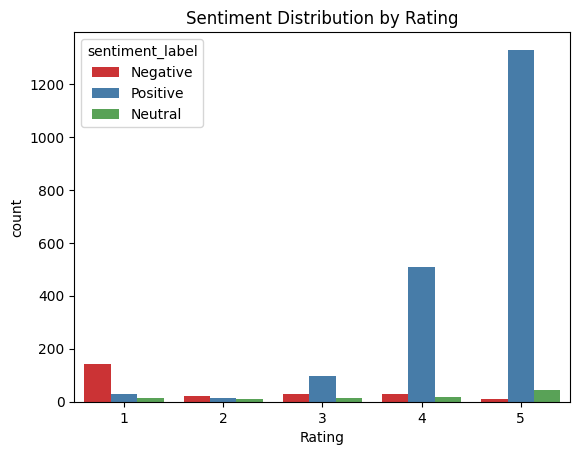

In [14]:
sns.countplot(x='Rating', hue='sentiment_label', data=df, palette='Set1')
plt.title('Sentiment Distribution by Rating')
plt.show()